# Making a nice and simple timeseries plot using the standard pandas plotting function

#### Challenge lies mostly in the fact that the time series is year week based

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# reading csv to dataframe
filename = './data/infections.csv'
df = pd.read_csv(filename)

In [3]:
# showing first few lines
# year and week are floats, not integers. I also need to make a year_week column
df.head(3)

,year,week,date,clostridium,rsv,rotavirus,salmonella
0,1996.000,27.000,W27 1996,201.000,7.000,155.000,132.000
1,1996.000,28.000,W28 1996,177.000,2.000,118.000,107.000
2,1996.000,29.000,W29 1996,168.000,1.000,90.000,106.000


In [4]:
# year and week are floats, so i cast them as what they are: integers
df[['year', 'week']] = df[['year', 'week']].astype(int)

In [5]:
# i also make a year-week (string) column:
df['year_week'] = df['year'].astype(str) + '-' + df['week'].astype(str).str.zfill(2)

In [6]:
# change year week string column to a date column (this becomes the last day of the week)
# here's explanation about the %Y, %U etc: https://docs.python.org/2/library/datetime.html
# %Y is a year with 4 digits. 
# %U is a weeknumber from a week that starts on a sunday
# %w is the weekday as a decimal number where 0=Sunday
df['date'] = pd.to_datetime(df.year_week + '-0', format='%Y-%U-%w')

In [7]:
# year_week data field is set as the index
df = df.set_index('date', drop=False)
df.index.names = ['year_week']

In [8]:
# year_week is now the index, data looks alright
df.head(3)

,year,week,date,clostridium,rsv,rotavirus,salmonella,year_week
year_week,,,,,,,,
1996-07-07,1996,27,1996-07-07,201.000,7.000,155.000,132.000,1996-27
1996-07-14,1996,28,1996-07-14,177.000,2.000,118.000,107.000,1996-28
1996-07-21,1996,29,1996-07-21,168.000,1.000,90.000,106.000,1996-29


In [9]:
# nice standard settings for my graphs
# font_scale=1.25 is a handy way of finding a nice font_size
sns.set(style='white', font_scale=1.25)

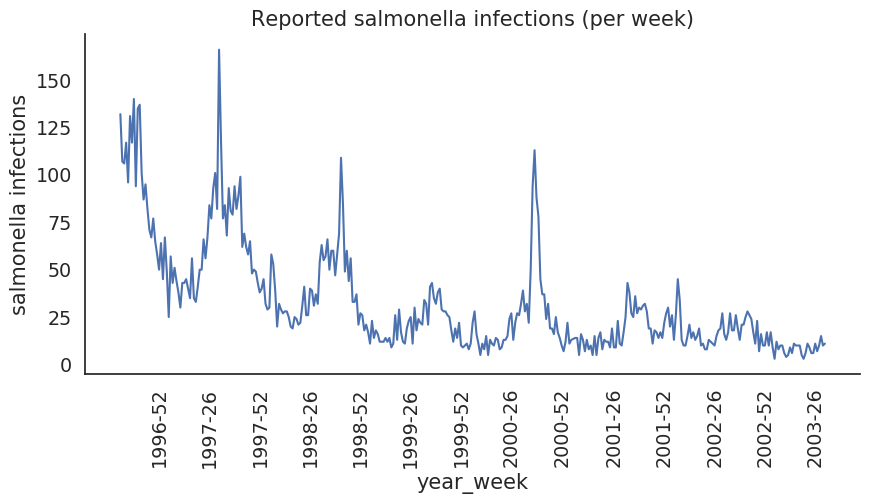

In [10]:
# plot the salmonella data
# using the plotting function that pandas provides, is a nice and fast way of getting a plot.
ax = df['salmonella'].plot(figsize=(10,5))
ax.set(
    ylabel='salmonella infections', 
    title='Reported salmonella infections (per week)',
)

# it's always difficult to get good xtick labels, whichever software you're using, especially with datetimes.
# unfortunately, pandas seems no exception, this is my way of getting it to work
nice_labels = [year_week if int(year_week[5:])%26==0 else '' for year_week in df.year_week]
plt.xticks(
    ticks=df.index, 
    labels=nice_labels,
    rotation=90,
)

# makes the graph a little bit prettier by removing right and upper line of graph.
sns.despine();